In [1]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from skimage.io import imread
from skimage.transform import resize

In [2]:
# Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = imread(os.path.join(folder, filename))
        if img is not None:
            img_resized = resize(img, (100, 100), anti_aliasing=True)  # Resize the image to a fixed size
            images.append(img_resized.flatten())   # Flatten the image array
            if "diseased" in folder:
                labels.append(1)  # Assign label 1 for diseased samples
            else:
                labels.append(0)  # Assign label 0 for normal samples
    return np.array(images), np.array(labels)


In [3]:
# Path to the folder containing normal and diseased paddy crop samples
data_path = "/media/paras/New Volume/Practice/PDxRL/ML_image_classification/testPaddy"

In [4]:
# Load images and labels
normal_images, normal_labels = load_images_from_folder(os.path.join(data_path, "normal"))
diseased_images, diseased_labels = load_images_from_folder(os.path.join(data_path, "diseased"))

In [5]:
# Concatenate normal and diseased images and labels
X = np.concatenate((normal_images, diseased_images), axis=0)
y = np.concatenate((normal_labels, diseased_labels), axis=0)

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [7]:
# Predictions
y_pred = svm_classifier.predict(X_test)

In [8]:
# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.75      1.00      0.86         3

    accuracy                           0.88         8
   macro avg       0.88      0.90      0.87         8
weighted avg       0.91      0.88      0.88         8

Accuracy: 0.875


In [9]:
'''
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
random_forest_classifier.fit(X_train, y_train)

# Predictions
y_pred = random_forest_classifier.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
'''

'\nfrom sklearn.ensemble import RandomForestClassifier\n\n# Initialize Random Forest classifier\nrandom_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)\n\n# Train the classifier\nrandom_forest_classifier.fit(X_train, y_train)\n\n# Predictions\ny_pred = random_forest_classifier.predict(X_test)\n\n# Evaluate the classifier\nprint("Classification Report:")\nprint(classification_report(y_test, y_pred))\nprint("Accuracy:", accuracy_score(y_test, y_pred))\n'

In [10]:
'''
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predictions
y_pred = knn_classifier.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
'''

'\nfrom sklearn.neighbors import KNeighborsClassifier\n\n# Initialize KNN classifier\nknn_classifier = KNeighborsClassifier(n_neighbors=5)\n\n# Train the classifier\nknn_classifier.fit(X_train, y_train)\n\n# Predictions\ny_pred = knn_classifier.predict(X_test)\n\n# Evaluate the classifier\nprint("Classification Report:")\nprint(classification_report(y_test, y_pred))\nprint("Accuracy:", accuracy_score(y_test, y_pred))\n'

In [11]:
# Load the new image
new_image_path = "/media/paras/New Volume/Practice/PDxRL/ML_image_classification/Paddy Data/Fresh Paddy/image5.jpeg"
new_image = imread(new_image_path)

# Preprocess the image (resize to match the training image size and flatten)
new_image_resized = resize(new_image, (100, 100), anti_aliasing=True)
new_image_flattened = new_image_resized.flatten()

# Use the trained KNN classifier to predict the class label of the new image
predicted_label = svm_classifier.predict([new_image_flattened])

# Print the predicted label
if predicted_label == 1:
    print("The new image is classified as diseased.")
else:
    print("The new image is classified as normal.")

The new image is classified as normal.


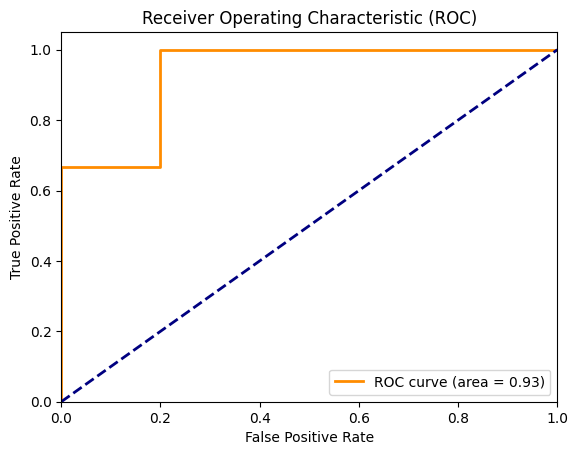

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class (diseased)
y_scores = svm_classifier.decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

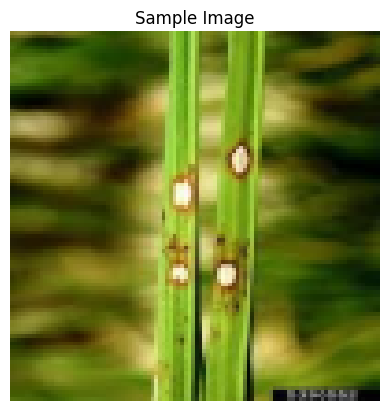

In [15]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = imread(os.path.join(folder, filename))
        if img is not None:
            img_resized = resize(img, (100, 100), anti_aliasing=True)  # Resize the image to a fixed size
            images.append(img_resized.flatten())   # Flatten the image array
            if "diseased" in folder:
                labels.append(1)  # Assign label 1 for diseased samples
            else:
                labels.append(0)  # Assign label 0 for normal samples
    return np.array(images), np.array(labels)

# Load images from a folder
data_path = "/media/paras/New Volume/Practice/PDxRL/ML_image_classification/testPaddy/diseased"
images, labels = load_images_from_folder(data_path)

# Choose an index to view an image
index = 0  # Change this index to view different images

# Reshape the flattened image array back to its original dimensions
image = images[index].reshape((100, 100, 3))  # Assuming the images are RGB (3 channels)

# Display the image
plt.imshow(image)
plt.title("Sample Image")
plt.axis('off')
plt.show()
